#                     CAR PRICE PREDICTION

## Problem Description: 

2021 was an unusual year for the automotive industry. Prices for both new and used cars skyrocketed due to shortage of semiconductor chip and supply chain problems.

There are many factors that contribute to price of a car such as brandname, transmission, cylinder, aspiration, etc.

In this final project, I am going to explore through the data of different types of cars in order to build a model that will help predict car prices base on various features.


## Business Objectives:

The target is to know if car price is mostly impacted by which variables. They can accordingly  design the cars, build the business strategy ect. to meet certain price levels. Moreoever, the model will be an efficient method to understand the pricing dynamics of a new market.  


### The dataset that I am working with contains information on different cars having some following features:

|Variable|Description|
|: ------------- |:-------------|
|1) Car_ID|Unique id of each observation (Integer)|
|2) Symboling |Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably| pretty safe. (Categorical)|
|3)carCompany| Name of a car company (Categorical)|
|4)fueltype| Car fuel type i.e gas or diesel (Categorical)|
|5)aspiration| Aspiration used in a car (Categorical)|
|6)doornumber |Number of doors in a car (Categorical)|
|7)carbody| The body of the car (Categorical)|
|8)drivewheel |Type of drive wheel (Categorical)|
|9)enginelocation| Location of a car engine (Categorical)|
|10)wheelbase| Wheelbase of a car (Numeric)|
|11)carlength| Length of the car (Numeric)|
|12)carwidth| Width of the car (Numeric)|
|13)carheight |Height of car (Numeric)|
|14)curbweight| The weight of a car without occupants or baggage. (Numeric)|
|15)enginetype |Type of engine. (Categorical)|
|16)cylindernumber| Cylinder placed in the car (Categorical)|
|17)enginesize| Size of the car (Numeric)|
|18)fuelsystem |Fuel system of car (Categorical)|
|19)boreratio| Boreratio of a car (Numeric)|
|20)stroke| Stroke or volume inside the engine (Numeric)|
|21)compressionratio| Compression ratio of a car (Numeric)|
|22)horsepower| Horsepower (Numeric)|
|23)peakrpm| Car peak rpm (Numeric)|
|24)citympg| Mileage in the city (Numeric)|



# 1. Data Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from sklearn import metrics

In [2]:
car=pd.read_csv('CarPrice.csv',sep=',')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 2. Data Exploration & Cleaning

In [3]:
data = car.copy()

In [4]:
#Splitting company name from CarName column
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Getting No. of Missing values and % of Missing values in each column - 
data_missing_values = pd.DataFrame(data.isnull().sum())
data_missing_values['var'] = data_missing_values.index

data_missing_values = data_missing_values.rename(columns={0:'missing_nos'})
data_missing_values['Percentage_Missing'] = data_missing_values['missing_nos'] *100/len(data)

data_missing_values

,missing_nos,var,Percentage_Missing
car_ID,0,car_ID,0.0
symboling,0,symboling,0.0
CompanyName,0,CompanyName,0.0
fueltype,0,fueltype,0.0
aspiration,0,aspiration,0.0
doornumber,0,doornumber,0.0
carbody,0,carbody,0.0
drivewheel,0,drivewheel,0.0
enginelocation,0,enginelocation,0.0
wheelbase,0,wheelbase,0.0


In [6]:
data.shape

(205, 26)

In [7]:
data['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
data['CompanyName'] = data['CompanyName'].str.lower()

def replace_name(a,b):
    data['CompanyName'].replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
data['CompanyName'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [10]:
# Check for duplicates
data.loc[data.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [11]:
data.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### - The column "Price" is the target variable and rest of the columns are independent variables.
### - Numerial variables: [‘wheelbase’, ‘carlength’, ‘carwidth’, ‘carheight’, ‘curbweight’, ‘enginesize’, ‘boreratio’, ‘stroke’, ‘compressionratio’, ‘horsepower’, ‘peakrpm’, ‘citympg’, ‘highwaympg’]

### - Categorical variables: [‘symboling’, ‘fueltype’, ‘aspiration’, ‘doornumber’, ‘carbody’, ‘drivewheel’, ‘enginelocation’, ‘enginetype’, ‘cylindernumber’, ‘fuelsystem’ ‘car_name’]

# 3. Visualizing the data

array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>],
       [<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

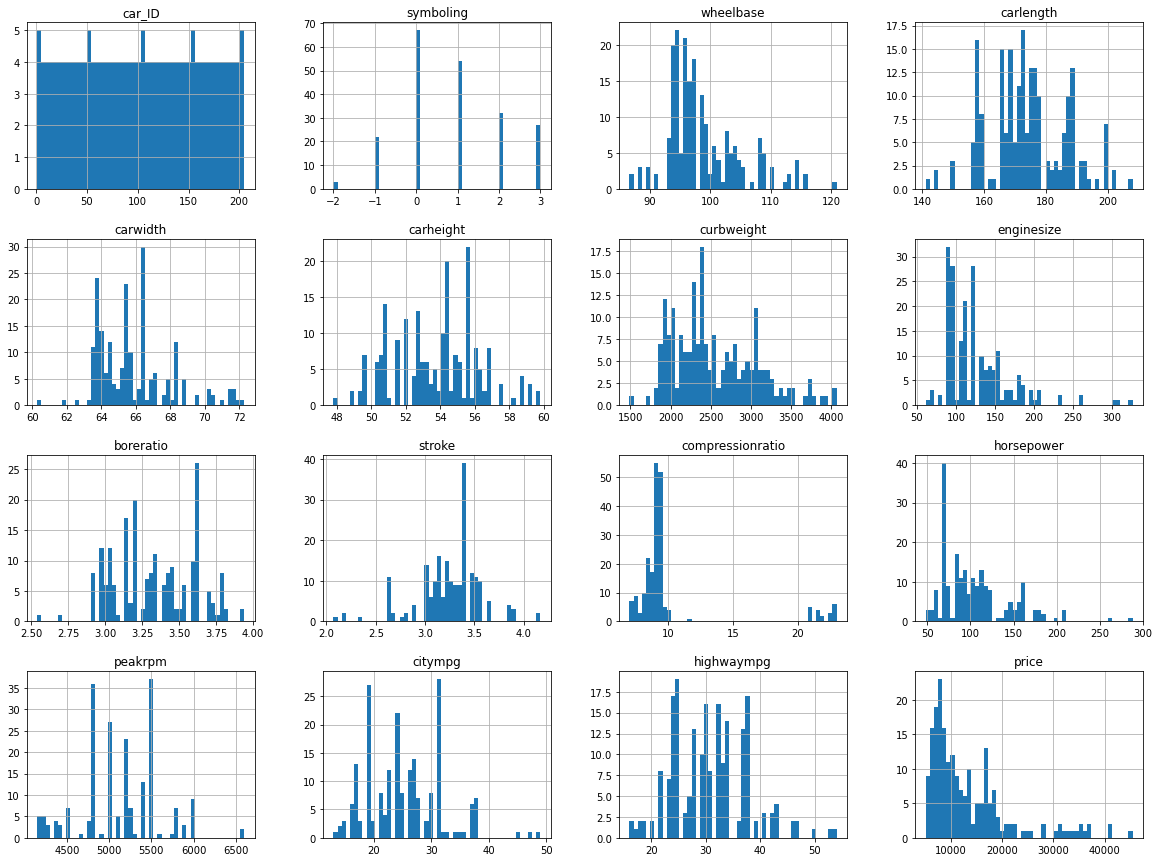

In [14]:
%matplotlib inline

data.hist(bins=50, figsize=(20, 15))

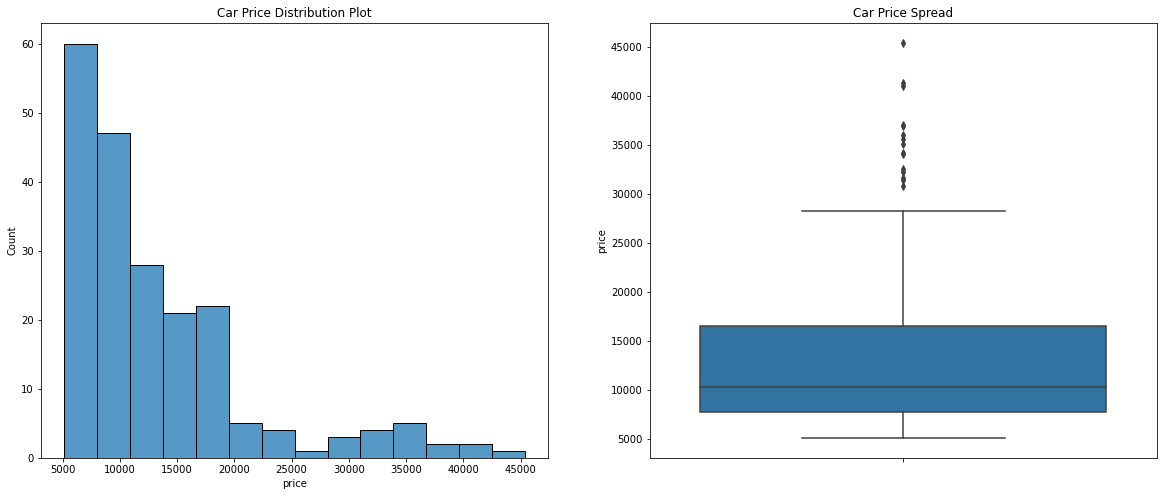

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(data['price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data['price'])

plt.show()

In [16]:
print(data['price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


## - The most prices in the dataset are low(Below 16,000).
## - There is a significant difference between the mean and the median of the price distribution
## - The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)


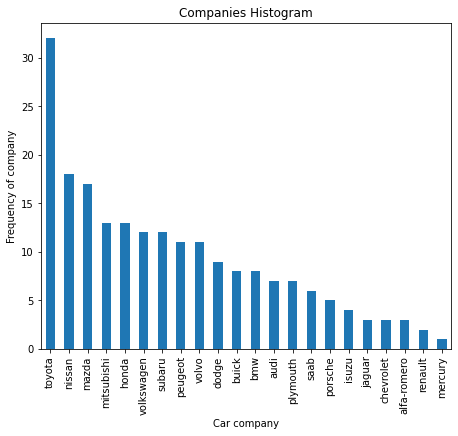

In [17]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.show()

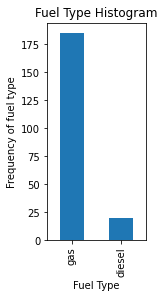

In [18]:
plt.subplot(1,3,2)
plt1 = data.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.show()

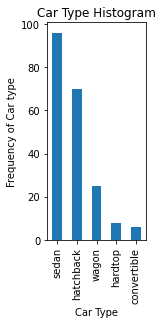

In [19]:
plt.subplot(1,3,3)
plt1 = data.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')
plt.show()

## -Toyota seemed to be favored car company.
## - Number of gas fueled cars are more than diesel.
## - sedan is the top car type prefered.

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


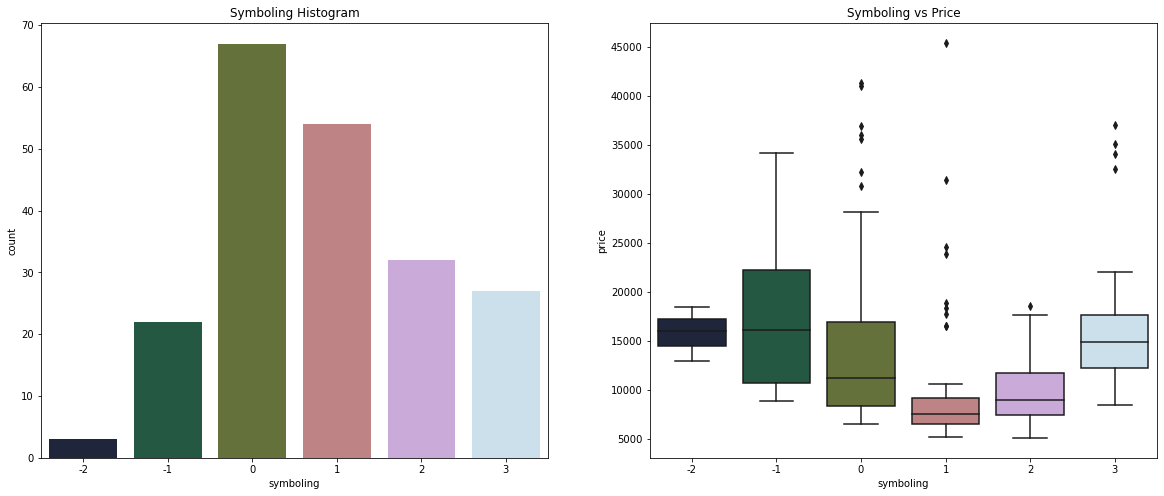

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(data.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=data.symboling, y=data.price, palette=("cubehelix"))

plt.show()

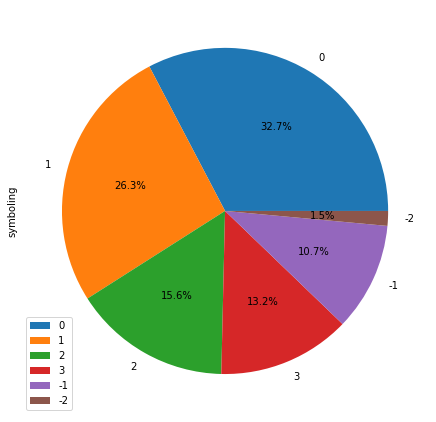

<Figure size 432x288 with 0 Axes>

In [21]:
data_sym = pd.DataFrame(data['symboling'].value_counts())
data_sym.plot.pie(subplots=True,labels = data_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

## - It seems that the symboling with 0 and 1 values have high number of rows (more than 50%) (i.e. They are most sold.)
## - The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


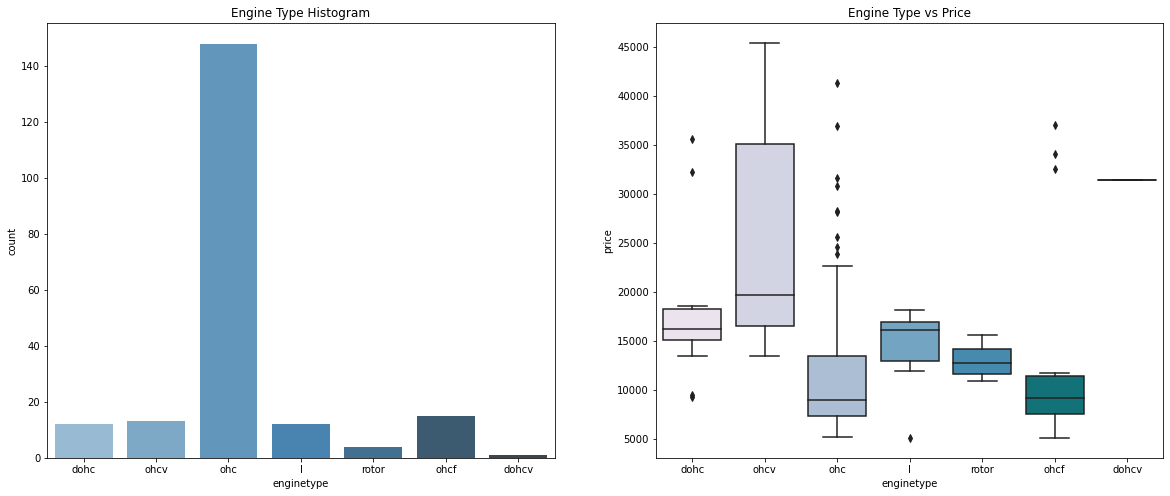

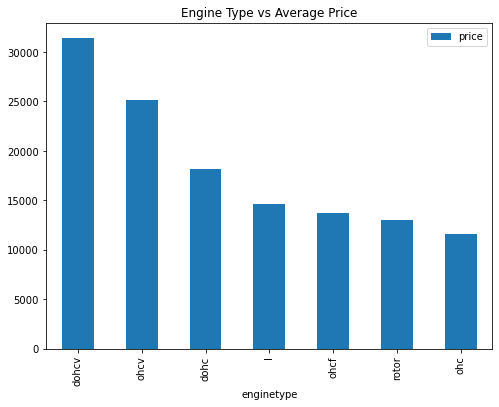

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(data.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=data.enginetype, y=data.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

## - ohc Engine type seems to be most favored type.
## - ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.


<Figure size 1800x432 with 0 Axes>

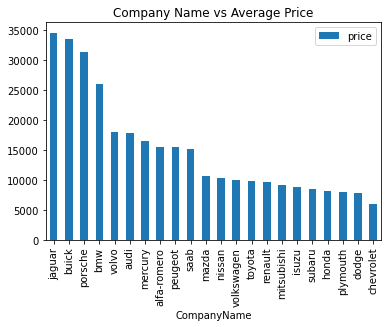

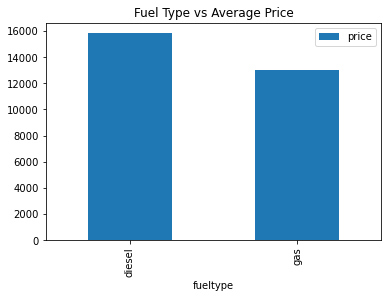

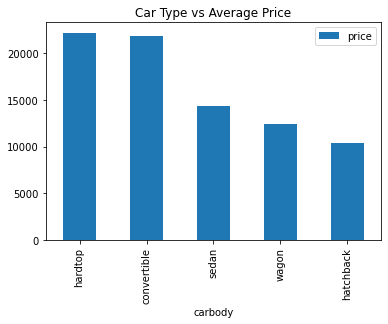

In [23]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

## - Jaguar and Buick seem to have highest average price.
## - Diesel has higher average price than gas.
## - Hardtop and convertible have higher average price.


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


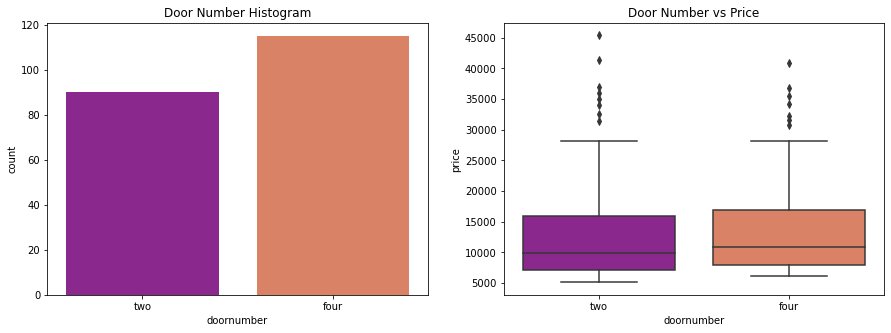

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber, y=data.price, palette=("plasma"))

plt.show()

In [ ]:
# cars with four doors are sold more than cars with two doors.
# doornumber variable is not affacting the price much. There is no significant difference between the categories in it.


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


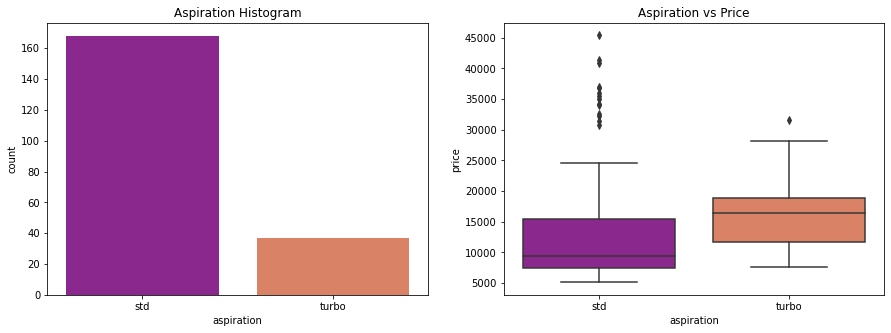

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(data.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=data.aspiration, y=data.price, palette=("plasma"))

plt.show()

## - Cars with manual transmission or standard transmission in certain region are more preferred than cars with turbo transmission
## - And price for standard transmission cars is cheaper than turbo transmission cars.
## -It seems aspiration with turbo have higher price range than the std.
## - advantage of having a turbo engine is that it gives you more power output due to its intake of air, meaning that you're going to have a much faster and powerful ride.

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWar

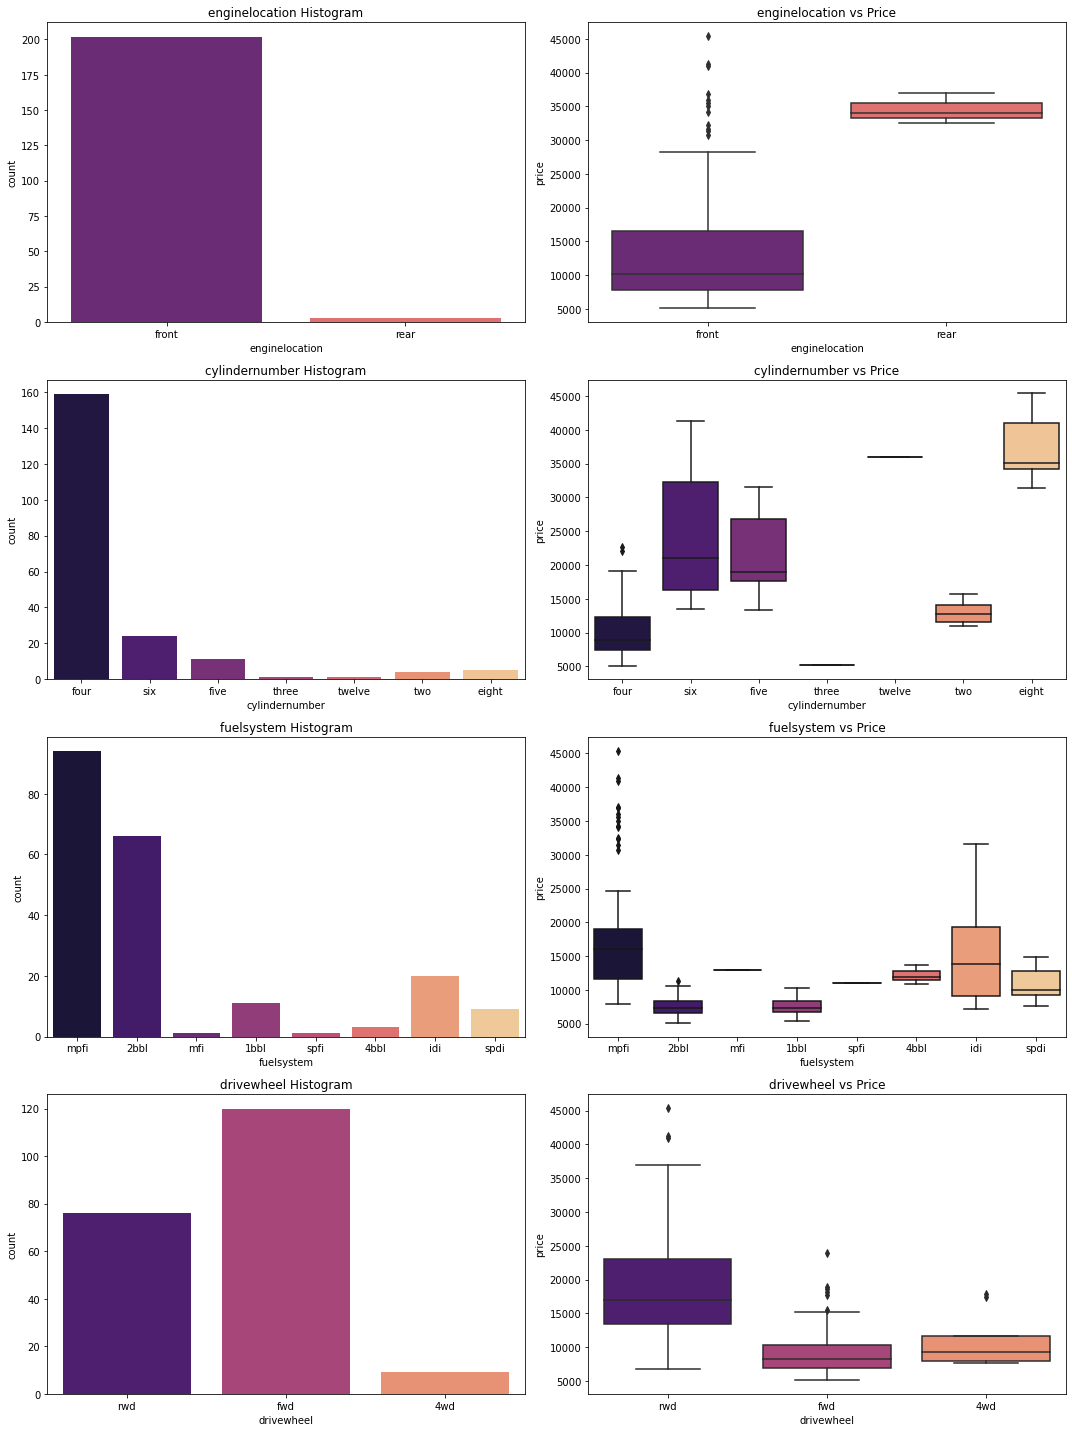

In [26]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=data[x], y=data.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

## - Most common number of cylinders are four and six. And cars with 8 cylinders are the most expensive.
## - Most common type of fuelsystem are mpfi and 2bbl. But cars with fuelsystem idi and mpfi have the highest price range. 
## - Cars with fwd are the most popular but cars with rwd drivewheel have the highest price range.

In [ ]:
# Visualising numerical data

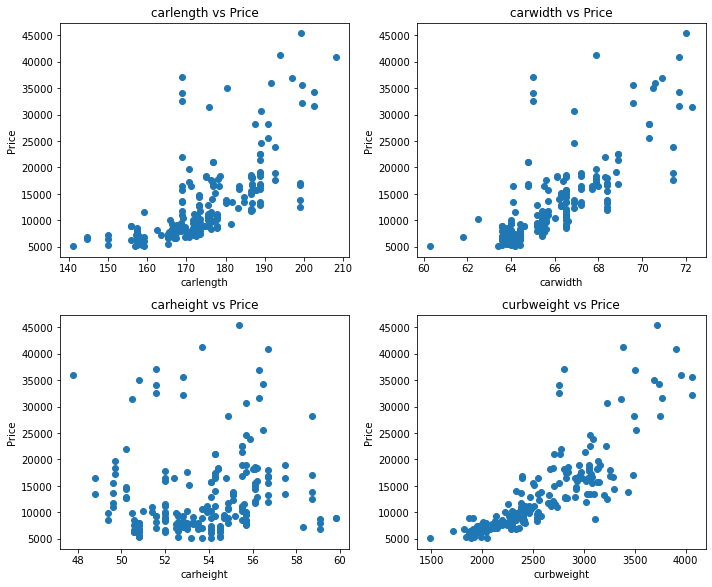

In [27]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

In [ ]:
# We can see that carheight does not show any impact on price
# carwidth, carlength and curbweight seems to have a correlation with price

In [28]:
np.corrcoef(data['carlength'], data['carwidth'])[0, 1]

0.841118268481846

In [29]:
# dropping symboling and car_ID 
cars_numeric = data.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
# correlation matrix
cor = cars_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


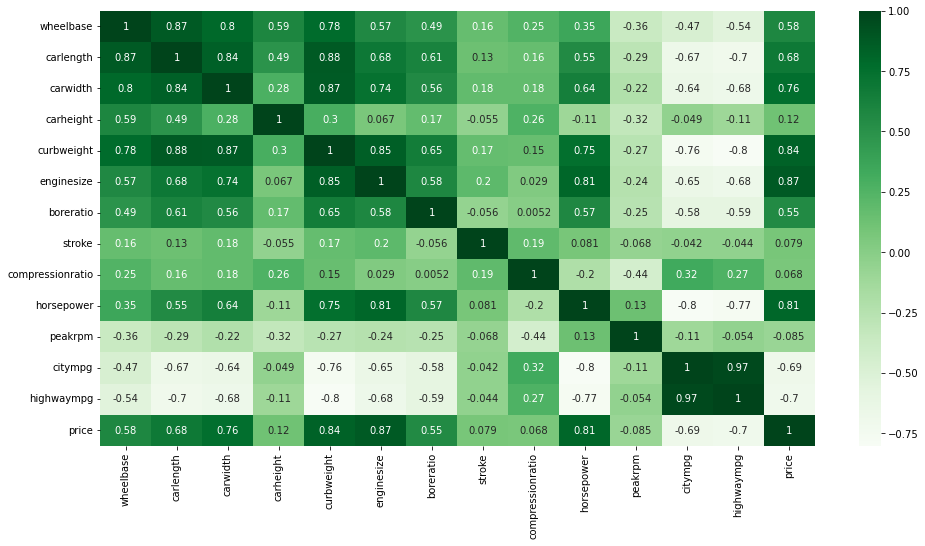

In [31]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(16,8))
# heatmap
sns.heatmap(cor, cmap="Greens", annot=True)
plt.show()

##  From heatmap, we can see that:
##     - Price is highly correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower
##     - Price is lessly correlated with citympg and highwaympg (about -0.7). 
## From that, we can say that cars having high mileage may fall in the economy cars category and have lower price.
##     - Many independent variables are highly correlated (look at the top-left part of matrix):wheelbase, ca

## Thus, while building the model, we’ll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

# 4. Data Featuring

In [ ]:
## Split the data into X and y:

In [32]:
X = data.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
        'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
        'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
        'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
        'horsepower', 'peakrpm', 'citympg', 'highwaympg',
        'CompanyName','price']]


In [ ]:
# Creat dummy variables for categorical variables

In [33]:
# subset all categorical variables
data_categorical = X.select_dtypes(include=['object'])
# convert into dummies
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
# drop categorical variables 
X = X.drop(list(data_categorical.columns), axis=1)
# concat dummy variables with X
X = pd.concat([X, data_dummies], axis=1)

In [ ]:
## Scaling the features and getting the final list of columns in dataframe for model building

In [34]:
# scaling the features
from sklearn.preprocessing import scale
# storing column names in cols
# scaling 
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName

In [35]:
# scaling 
# cols = y.columns
y = X['price']
X = X.drop(['price'], axis=1)

In [ ]:
# Finally split train-test data

In [36]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2,random_state=100)

# 5. Data Modelling & Evaluation

## Linear Regression Model

In [ ]:
## First I use Linear Regression Model for predict

In [37]:
# Model Building
lr = LinearRegression()

# Training Model
lr.fit(X_train, y_train)

# Predict Model
y_pred_lr = lr.predict(X_test)

# metrics
from sklearn.metrics import r2_score

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print(r2_score(y_test, y_pred_lr))


0.8589813805806383


## We have approximately 86% r_squared with all the variables.  
## Let's see how much we can get with lesser features

In [38]:
lr_16 = LinearRegression()
lr_16.fit(X_train,y_train)
rfe_16 = RFE(lr_16,n_features_to_select= 16)
rfe_16.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=16)

In [39]:
# predict using rfe model
y_pred_16 = rfe_16.predict(X_test)

In [40]:
# r-squared of 10 features
r_squared_16 = r2_score(y_test,y_pred_16)
rmse_16 = np.sqrt(mean_squared_error(y_test,y_pred_16))
print(r2_score(y_test, y_pred_16))

0.8662543166944043


In [41]:
lr_10 = LinearRegression()
lr_10.fit(X_train,y_train)
rfe_10 = RFE(lr_10,n_features_to_select= 10)
rfe_10.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [42]:
# predict using rfe model
y_pred_10 = rfe_10.predict(X_test)

In [43]:
# r-squared of 10 features
r_squared_10 = r2_score(y_test,y_pred_10)
rmse_10 = np.sqrt(mean_squared_error(y_test,y_pred_10))
print(r2_score(y_test, y_pred_10))

0.8809875293129562


In [44]:
# RFE with 5 features
lr_5 = LinearRegression()
lr_5.fit(X_train,y_train)
rfe_5 = RFE(lr_5,n_features_to_select= 5)
rfe_5.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [45]:
# predict with 5 features
y_pred_5 = rfe_5.predict(X_test)

In [46]:
# r-squared of 5 features
r_squared_5 = r2_score(y_test,y_pred_5)
rmse_5 = np.sqrt(mean_squared_error(y_test,y_pred_5))
print(r2_score(y_test, y_pred_5))

0.8680182826751107


## We can see that RFE with 10 features give the best accuracy 88%

# RandomForestRegressor

In [47]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor()

# Training Model
rf.fit(X_train,y_train)

# Model Summary
y_pred_rf = rf.predict(X_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print(r2_score(y_test, y_pred_rf))

0.9045862486540076


## GBT Regressor Model

In [48]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(X_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(X_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print(r2_score(y_test, y_pred_gbt))

0.8895531367845895


## Through those algorithms, it can be said that Random Forest Regressor Model is giving the best accuracy compared to others. 

In [ ]:
## Evaluation the Random Forest Regressor Model on test data

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE: 0.23208838630419074
MSE: 0.11573781338886426
RMSE: 0.3402026063816447


In [50]:
predictions=rf.predict(X_test)

In [51]:
predictions

array([-7.01337641e-01, -5.76050031e-01, -3.83840555e-01, -4.65310671e-01,
       -7.02168324e-01, -4.40615203e-01,  5.71989120e-01,  5.99817427e-01,
       -2.53973957e-02,  6.77459330e-01,  7.76041267e-01,  5.10618317e-01,
        1.54107143e-01, -2.71057531e-01,  2.69448599e+00, -8.73647317e-01,
       -7.07115406e-01,  2.03835414e-01,  1.74085368e-01,  1.25774404e-01,
        1.78134426e-01,  2.57585763e-01,  2.49658387e+00, -9.37691488e-01,
       -3.54113305e-01,  2.13710758e-01,  1.72590264e-01,  1.92777541e+00,
        6.69088274e-02,  1.24072528e-03, -8.58916492e-01,  2.95698837e+00,
        4.70059978e-01,  9.74972962e-01, -2.14934769e-02, -2.52437427e-01,
        1.66908700e-01, -2.99820251e-01, -7.88091336e-01, -3.26315533e-01,
        2.75813803e+00])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

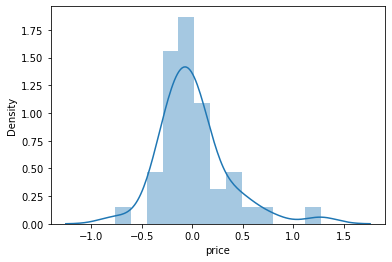

In [52]:
sns.distplot(y_test-predictions)

Text(0.5, 1.0, ' Actual Prices vs Predicted Prices')

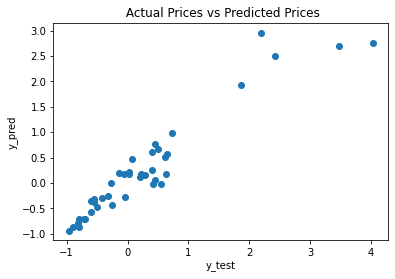

In [53]:
plt.scatter(y_test,predictions)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title(" Actual Prices vs Predicted Prices")

## We can see that y_test and y_pred are nearly the same. So with this data, we can use model Random Forest Regressor to predict price

# 5. Export the tested model to Pickle file

In [54]:
import pickle
with open ('Car price prediction_model.pkl', 'wb') as file:
    # dump information to that file
    pickle.dump(rf, file)

In [ ]:
#with open('Car price prediction_model.pkl', 'rb') as f:
   # mp=pickle.load(f)
    